### Task
The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

In [1]:
# Importing the packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Importing the data

train = pd.read_csv("Train_set/train.csv", index_col='case_id')
test = pd.read_csv("Test_set/test.csv", index_col='case_id')
print("Dimension of Training set : ",train.shape)
print("Dimension of Test set : ",test.shape)

Dimension of Training set :  (318438, 17)
Dimension of Test set :  (137057, 16)


In [3]:
train.head().T

case_id,1,2,3,4,5
Hospital_code,8,2,10,26,26
Hospital_type_code,c,c,e,b,b
City_Code_Hospital,3,5,1,2,2
Hospital_region_code,Z,Z,X,Y,Y
Available Extra Rooms in Hospital,3,2,2,2,2
Department,radiotherapy,radiotherapy,anesthesia,radiotherapy,radiotherapy
Ward_Type,R,S,S,R,S
Ward_Facility_Code,F,F,E,D,D
Bed Grade,2,2,2,2,2
patientid,31397,31397,31397,31397,31397


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318438 entries, 1 to 318438
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [5]:
train.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [6]:
train['Bed Grade'].value_counts(dropna=False)

2.0    123671
3.0    110583
4.0     57566
1.0     26505
NaN       113
Name: Bed Grade, dtype: int64

### Treating the missing Values with Mode

In [7]:
for column in ['Bed Grade', 'City_Code_Patient']:
    train[column].fillna(train[column].mode()[0], inplace=True)

### Converting Object Type data to Categorical Type Data

In [9]:
columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','Age']

for column in columns:
    train[column] = train[column].astype('category').cat.codes

#### Label Encoding Method

<table>
    <tr>
        <th>Department </th>
        <th>Hospital Region Code</th>
        <th>Hospital Type Code</th>
        <th>Ward Type</th>
        <th>Ward Facility Code</th>
    </tr>
    <tr>
        <td>
        
| Department | ID |
| :-: | :-: |
|'TB & Chest disease' | 0 |
|'anesthesia' | 1 |
|'gynecology' | 2 |
|'radiotheraphy' | 3 |
|'surgery' | 4 |
        
</td><td>
        
| Hospital_region_code | ID |
| :-: | :-: |
| X | 0 |
| Y | 1 |
| Z | 2 |
        
</td><td>
        
| Hospital_type_code | ID |
| :-: | :-: |
| a | 0 |
| b | 1 |
| c | 2 |
| d | 3 |
| e | 4 |
| f | 5 |
| g | 6 |
        
</td><td>
        
| Ward_Type | ID |
| :-: | :-: |
| P | 0 |
| Q | 1 |
| R | 2 |
| S | 3 |
| T | 4 |
| U | 5 |
        
</td><td>
        
| Ward_Facility_Code | ID |
| :-: | :-: |
| A | 0 |
| B | 1 |
| C | 2 |
| D | 3 |
| E | 4 |
| F | 5 |

</td><td>
        
<tr>
        <th>Type of Admission</th>
        <th>Severity of Illness</th>
    <th>Age</th>
</tr>   
<td>
    
| Type of Admission | ID |
| :-: | :-: |
| Emergency | 0 |
| Trauma | 1 |
| Urgent | 2 |

</td><td>
        
| Severity of Illness | ID |
| :-: | :-: |
| Extreme | 0 |
| Minor | 1 |
| Moderate | 2 |
        
</td><td>

| Age | ID |
| :-: | :-: |
| 0-10 | 0 |
| 11-20 | 1 |
| 21-30 | 2 |
| 31-40 | 3 |
| 41-50 | 4 |
| 51-60 | 5 |
| 61-70 | 6 |
| 71-80 | 7 |
| 81-90 | 8 |
| 91-100 | 9 |
        
</td>
</table>

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Hospital_code,318438.0,18.318841,8.633755,1.0,11.0,19.0,26.0,32.0
Hospital_type_code,318438.0,1.256841,1.535712,0.0,0.0,1.0,2.0,6.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.0,5.0,7.0,13.0
Hospital_region_code,318438.0,0.778098,0.752527,0.0,0.0,1.0,1.0,2.0
Available Extra Rooms in Hospital,318438.0,3.197627,1.168171,0.0,2.0,3.0,4.0,24.0
Department,318438.0,1.943779,0.561245,0.0,2.0,2.0,2.0,4.0
Ward_Type,318438.0,1.888575,0.804655,0.0,1.0,2.0,2.0,5.0
Ward_Facility_Code,318438.0,3.286913,1.688050,0.0,2.0,4.0,5.0,5.0
Bed Grade,318438.0,2.625585,0.873070,1.0,2.0,3.0,3.0,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.0,65724.5,98470.0,131624.0


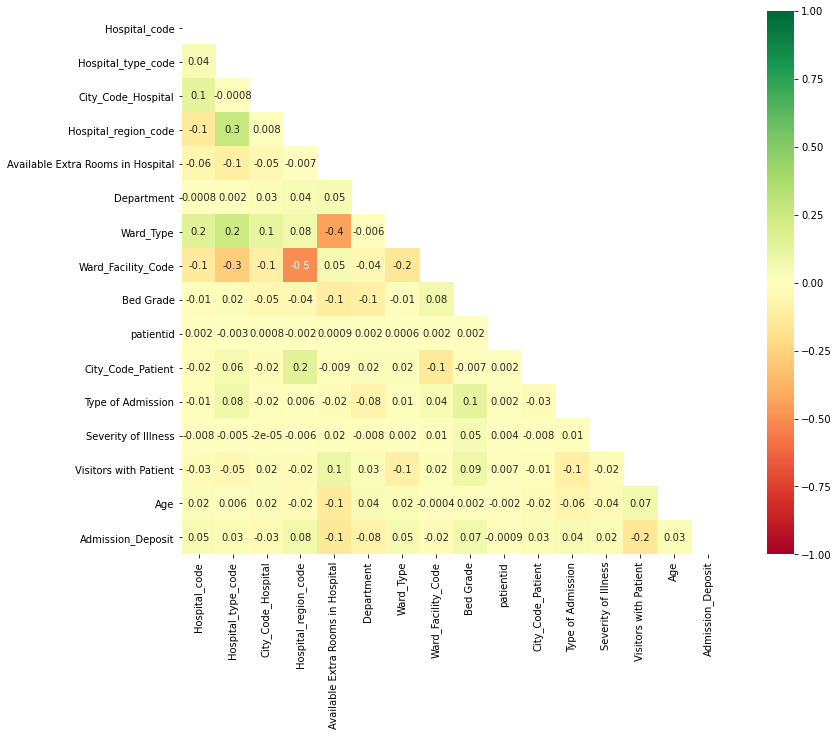

In [12]:
fig = plt.figure(figsize=(15,10))

mask = np.triu(train.corr())
sns.heatmap(train.corr(), 
            annot=True,
            fmt ='.1g',
            vmax=1, 
            vmin=-1, 
            center=0,
            cmap='RdYlGn',
            square=True,
            mask = mask)
plt.show()

### Model Building

In [13]:
features = train.iloc[:,:-1]
labels = train.iloc[:,-1:]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [15]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(learning_rate=0.0001,
                           eval_metric='AUC')

model.fit(x_train,
          y_train,
          eval_set=eval_dataset,
          verbose=False)

print(model.get_best_score())

KeyboardInterrupt: 

In [19]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [20]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  

Y_pred = knn.predict(x_test)  

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  

Y_pred = gaussian.predict(x_test)  

acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  

Y_pred = decision_tree.predict(x_test)  

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df.style.hide_index()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**k

NameError: name 'acc_log' is not defined